# Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib import figure
import scipy
#KNN classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

# matrics to test the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN /Final Results/FIRST-SDSS.csv')

In [5]:
df.head()

,FIRST,Fint,Rms,objID,RA,Dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,psfMagErr_u,psfMagErr_g,psfMagErr_r,psfMagErr_i,psfMagErr_z,petroR50_r,petroR90_r,clean,mode,zWarning,PhotZerr,zConf,SpecZ,SpecZerr,class_pred,subClass,sourceType,type,photoZ,oi_6300_flux,oii_3726_flux,oii_3729_flux,oiii_5007_flux,oiii_4959_flux,nii_6584_flux,sii_6731_flux,sii_6717_flux,h_alpha_flux,h_gamma_flux,nii_6584_flux_err,h_alpha_flux_err,oiii_5007_flux_err,h_beta_flux,h_beta_flux_err,h_delta_flux,h_delta_flux_err
0,J233432.0+023321,1.57,0.131,1237678619025670741,353.633445,2.555875,25.603975,21.979671,20.141863,20.161863,20.092842,25.519363,21.958361,20.131908,20.161839,20.042963,0.495535,0.058073,0.020200,0.027347,0.090742,0.518308,0.054237,0.022839,0.030797,0.080951,0.488823,1.055620,1,1,0.0,NaN,-9999.0,4.101827,0.000246,QSO,BROADLINE,QSO,STAR,-9999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J233432.0+023321,1.57,0.131,1237678619025670741,353.633445,2.555875,25.603975,21.979671,20.141863,20.161863,20.092842,25.519363,21.958361,20.131908,20.161839,20.042963,0.495535,0.058073,0.020200,0.027347,0.090742,0.518308,0.054237,0.022839,0.030797,0.080951,0.488823,1.055620,1,1,0.0,NaN,-9999.0,4.102432,0.000292,QSO,BROADLINE,QSO,STAR,-9999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J104240.5+023320,7.72,0.368,1237651736822284898,160.668752,2.555854,25.373728,23.244883,21.996115,21.131029,20.102383,25.138662,23.429121,22.347485,21.527140,20.380968,1.184713,0.348162,0.152156,0.101913,0.182673,1.066352,0.334662,0.156027,0.105224,0.170953,0.929321,2.217754,1,1,NaN,0.074960,99.0,-9999.000000,-9999.000000,-9999,NaN,NaN,GALAXY,0.615515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J160651.8+023320,2.64,0.153,1237651737931415767,241.715688,2.555603,23.131889,19.271101,17.758698,17.199873,16.951887,23.696114,20.487232,18.905230,18.298183,18.043259,1.169534,0.018501,0.008653,0.008718,0.023517,0.862097,0.025905,0.013069,0.013527,0.033656,1.829160,5.463275,1,1,NaN,0.030034,98.0,-9999.000000,-9999.000000,-9999,NaN,NaN,GALAXY,0.228892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J212701.2+023319,12.12,0.116,1237678598073746790,321.755573,2.555440,24.009775,24.612249,21.946434,21.046663,20.192780,24.109003,24.584175,22.035059,21.202360,20.284349,0.923375,0.621717,0.112751,0.076344,0.124483,0.886381,3.662088,0.109767,0.076862,0.120196,0.746284,1.709355,1,1,NaN,0.042313,99.0,-9999.000000,-9999.000000,-9999,NaN,NaN,GALAXY,0.563015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [6]:
df.class_pred.value_counts()

-9999     195755
GALAXY     91987
QSO        36491
STAR        2154
Name: class_pred, dtype: int64

In [7]:
u = []
g = []
r = []
i = []
z = []
psf_r = []
petro_50 = []
petro_90 = []
J = []
H = []
K = []

In [8]:
attributes = df.values

In [9]:
for j in attributes:
    if j[35] =="STAR" or j[35]=="GALAXY":
        u.append(j[6])
        g.append(j[7])
        r.append(j[8])
        i.append(j[9])
        z.append(j[10])
        psf_r.append(j[13])
        petro_50.append(j[26])
        petro_90.append(j[27]) 
        

In [10]:
data = pd.DataFrame([u, g, r, i, z, psf_r,petro_50,petro_90])
Training_set = data.transpose()
Training_set.columns = ['u', 'g', 'r', 'i', 'z', 'psf_r','petro_50','petro_90']

In [11]:
pred = df['class_pred']

In [12]:
STAR_GALAXY = []
for c in pred:
  if c =="STAR" or c =="GALAXY":
    STAR_GALAXY.append(c)
  else:
    pass

In [13]:
Spectroscopic_class = pd.DataFrame(STAR_GALAXY)

In [14]:
Spectroscopic_class.columns=['Target']

In [15]:
Spectroscopic_class.Target.value_counts()

GALAXY    91987
STAR       2154
Name: Target, dtype: int64

In [16]:
Spectroscopic_class.columns=['Target']

In [17]:
Data = pd.concat([Training_set,Spectroscopic_class], axis=1)

In [18]:
Data

,u,g,r,i,z,psf_r,petro_50,petro_90,Target
0,22.995157,21.321014,19.473618,18.761360,18.403288,20.315123,1.428242,4.197634,GALAXY
1,19.404934,17.366480,16.377560,15.928306,15.563055,17.671577,1.751382,5.804237,GALAXY
2,17.647282,16.507330,15.946342,15.438098,15.236793,17.185854,1.671279,4.339408,GALAXY
3,23.140202,21.961468,20.563427,19.947535,19.512135,20.799417,0.899881,2.050872,GALAXY
4,20.545263,18.712301,17.638498,17.163239,16.792799,18.638563,1.472431,4.185897,GALAXY
...,...,...,...,...,...,...,...,...,...
94136,20.763815,19.373798,18.529739,17.990454,17.670475,19.864452,1.674635,4.332689,GALAXY
94137,20.225348,18.295778,17.124018,16.673910,16.293901,18.493824,1.889129,6.054881,GALAXY
94138,20.480944,18.641853,17.405323,16.904343,16.481255,18.879244,1.928441,5.912838,GALAXY
94139,23.781832,21.440834,19.474218,18.801785,18.344181,20.491476,1.044172,3.286166,GALAXY


In [19]:
Data.fillna(Data.mean())

,u,g,r,i,z,psf_r,petro_50,petro_90,Target
0,22.995157,21.321014,19.473618,18.761360,18.403288,20.315123,1.428242,4.197634,GALAXY
1,19.404934,17.366480,16.377560,15.928306,15.563055,17.671577,1.751382,5.804237,GALAXY
2,17.647282,16.507330,15.946342,15.438098,15.236793,17.185854,1.671279,4.339408,GALAXY
3,23.140202,21.961468,20.563427,19.947535,19.512135,20.799417,0.899881,2.050872,GALAXY
4,20.545263,18.712301,17.638498,17.163239,16.792799,18.638563,1.472431,4.185897,GALAXY
...,...,...,...,...,...,...,...,...,...
94136,20.763815,19.373798,18.529739,17.990454,17.670475,19.864452,1.674635,4.332689,GALAXY
94137,20.225348,18.295778,17.124018,16.673910,16.293901,18.493824,1.889129,6.054881,GALAXY
94138,20.480944,18.641853,17.405323,16.904343,16.481255,18.879244,1.928441,5.912838,GALAXY
94139,23.781832,21.440834,19.474218,18.801785,18.344181,20.491476,1.044172,3.286166,GALAXY


In [20]:
Data.dropna(inplace=True)

In [21]:
Data

,u,g,r,i,z,psf_r,petro_50,petro_90,Target
0,22.995157,21.321014,19.473618,18.761360,18.403288,20.315123,1.428242,4.197634,GALAXY
1,19.404934,17.366480,16.377560,15.928306,15.563055,17.671577,1.751382,5.804237,GALAXY
2,17.647282,16.507330,15.946342,15.438098,15.236793,17.185854,1.671279,4.339408,GALAXY
3,23.140202,21.961468,20.563427,19.947535,19.512135,20.799417,0.899881,2.050872,GALAXY
4,20.545263,18.712301,17.638498,17.163239,16.792799,18.638563,1.472431,4.185897,GALAXY
...,...,...,...,...,...,...,...,...,...
94136,20.763815,19.373798,18.529739,17.990454,17.670475,19.864452,1.674635,4.332689,GALAXY
94137,20.225348,18.295778,17.124018,16.673910,16.293901,18.493824,1.889129,6.054881,GALAXY
94138,20.480944,18.641853,17.405323,16.904343,16.481255,18.879244,1.928441,5.912838,GALAXY
94139,23.781832,21.440834,19.474218,18.801785,18.344181,20.491476,1.044172,3.286166,GALAXY


# Feature Scaling

# Training and Predictions

In [22]:
u_g = Data.u - Data.g
g_r = Data.g - Data.r
r_i = Data.r - Data.i
i_z = Data.i - Data.z
psf_r = Data.psf_r - Data.r
c = Data.petro_90 / Data.petro_50
u = Data.u
g = Data.g
r = Data.r
i = Data.i
z = Data.z

In [23]:
dfram = pd.DataFrame([u_g,g_r,r_i,i_z,c])
X = dfram.transpose()

In [24]:
X

,0,1,2,3,4
0,1.674143,1.847396,0.712258,0.358072,2.939022
1,2.038454,0.988920,0.449254,0.365251,3.314090
2,1.139952,0.560988,0.508244,0.201305,2.596459
3,1.178734,1.398041,0.615892,0.435400,2.279048
4,1.832962,1.073803,0.475259,0.370440,2.842848
...,...,...,...,...,...
94136,1.390017,0.844059,0.539285,0.319979,2.587244
94137,1.929570,1.171760,0.450108,0.380009,3.205118
94138,1.839091,1.236530,0.500980,0.423088,3.066123
94139,2.340998,1.966616,0.672433,0.457604,3.147150


In [25]:
X.columns=['u_g','g_r','r_i','i_z','c']

In [26]:
y = Data.Target.values

In [27]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN /Final Results/Balanced_Data.csv')

In [28]:
data.head()

,u_g,g_r,r_i,i_z,c,psf_r,u,g,r,i,z,Target
0,2.338095,0.965683,0.951351,0.537676,2.463001,1.000790,23.285988,20.947893,19.982210,19.030859,18.493183,STAR
1,1.542921,0.769695,0.350641,-1.091827,3.839542,0.205792,22.854280,21.311359,20.541664,20.191023,21.282850,STAR
2,1.675731,1.748184,1.073052,0.618036,2.858039,1.326976,22.466951,20.791220,19.043036,17.969984,17.351948,STAR
3,1.931715,0.849874,0.900654,-0.004587,1.747248,0.097423,24.551933,22.620218,21.770344,20.869690,20.874277,STAR
4,1.791198,0.427948,0.135430,0.314285,2.367925,0.048649,23.549871,21.758673,21.330725,21.195295,20.881010,STAR


In [29]:
X = data.iloc[:,0:4]

In [30]:
y = data.Target

In [31]:
y

0         STAR
1         STAR
2         STAR
3         STAR
4         STAR
         ...  
4303    GALAXY
4304    GALAXY
4305    GALAXY
4306    GALAXY
4307    GALAXY
Name: Target, Length: 4308, dtype: object

In [32]:
X

,u_g,g_r,r_i,i_z
0,2.338095,0.965683,0.951351,0.537676
1,1.542921,0.769695,0.350641,-1.091827
2,1.675731,1.748184,1.073052,0.618036
3,1.931715,0.849874,0.900654,-0.004587
4,1.791198,0.427948,0.135430,0.314285
...,...,...,...,...
4303,2.034109,1.130727,0.453623,0.353010
4304,3.470188,1.738305,0.614980,0.400946
4305,0.684719,1.684629,0.829972,0.518657
4306,0.389780,0.388037,0.418539,0.476338


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [35]:
my_list = list(range(1,35,2))
neighbors = list(filter(lambda x: x%2 != 0, my_list))
acc_score = []
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  acc_score.append(score)

Text(0.5, 0, 'Number of Neighbors K')

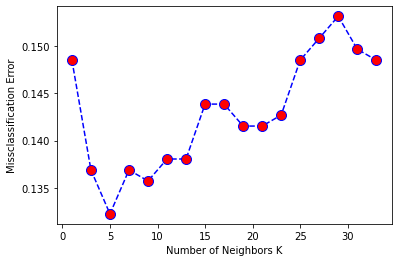

In [36]:
MSE = [1 - x for x in acc_score]
optimal_k = neighbors[MSE.index(min(MSE))]
plt.plot(neighbors, MSE, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.ylabel('Missclassification Error')
plt.xlabel('Number of Neighbors K')

In [37]:
k_values = [i for i in range(1,35,2)]
# empty list thatwill hold cv_score
k_acc_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    cv_scores=cross_val_score(knn, X_train , y_train,cv=5, scoring='accuracy')
    k_acc_scores.append(cv_scores.mean())  

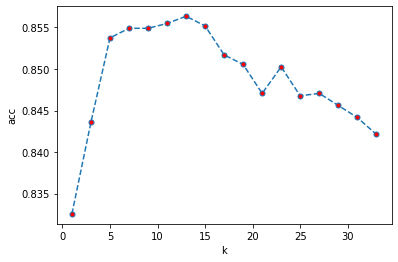

In [38]:
optimal_k = k_values[k_acc_scores.index(max(k_acc_scores))]
plt.plot(k_values,k_acc_scores, linestyle='dashed', marker='o',markerfacecolor='red',markersize=5)
plt.xlabel('k')
plt.ylabel('acc')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13, metric = 'euclidean', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
print("Test - Accuracy :", metrics.accuracy_score(y_test, y_pred))
print("Test - Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print("Test - classification report :", metrics.classification_report(y_test, y_pred))

Test - Accuracy : 0.8619489559164734
Test - Confusion matrix: [[386  45]
 [ 74 357]]
Test - classification report :               precision    recall  f1-score   support

      GALAXY       0.84      0.90      0.87       431
        STAR       0.89      0.83      0.86       431

    accuracy                           0.86       862
   macro avg       0.86      0.86      0.86       862
weighted avg       0.86      0.86      0.86       862



In [47]:
dataset = pd.DataFrame({'u-g': X_test[:, 0], 'g-r': X_test[:, 1], 'r-i': X_test[:, 2], 'i-z': X_test[:, 3]})

In [48]:
#dataset

In [49]:
Target = pd.DataFrame([y_pred])

In [50]:
CLASS = Target.transpose()

In [51]:
CLASS.columns=['Target']

In [52]:
knn_classifier = pd.concat([dataset,CLASS],axis=1)

In [53]:
knn_classifier

,u-g,g-r,r-i,i-z,Target
0,0.681715,-0.652209,0.540499,0.350296,GALAXY
1,0.188137,-0.696933,0.560263,0.343848,STAR
2,-0.039010,-0.641167,0.577015,0.350383,GALAXY
3,0.080360,-0.675781,0.784901,0.405398,STAR
4,0.157518,-0.681813,0.668260,0.381076,STAR
...,...,...,...,...,...
857,0.175736,-0.672160,0.585339,0.354964,STAR
858,-0.215326,-0.515861,0.717925,0.359588,GALAXY
859,0.005634,-0.553845,0.688767,0.362819,GALAXY
860,-0.021506,-0.758565,0.649512,0.250408,GALAXY


In [54]:
knn_classifier

,u-g,g-r,r-i,i-z,Target
0,0.681715,-0.652209,0.540499,0.350296,GALAXY
1,0.188137,-0.696933,0.560263,0.343848,STAR
2,-0.039010,-0.641167,0.577015,0.350383,GALAXY
3,0.080360,-0.675781,0.784901,0.405398,STAR
4,0.157518,-0.681813,0.668260,0.381076,STAR
...,...,...,...,...,...
857,0.175736,-0.672160,0.585339,0.354964,STAR
858,-0.215326,-0.515861,0.717925,0.359588,GALAXY
859,0.005634,-0.553845,0.688767,0.362819,GALAXY
860,-0.021506,-0.758565,0.649512,0.250408,GALAXY


**Predict the number of sources using knn**

In [55]:
parameters = knn_classifier.values

In [56]:
c_train_star = []
u_g_train_star = []
g_r_train_star = []
r_i_train_star = []
i_z_train_star = []
u_r_train_star = []
r_z_train_star = []
r_train_star = []
for p in parameters:
    if p[-1] =='STAR':
        u_g_train_star.append(p[0])
        g_r_train_star.append(p[1])
        r_i_train_star.append(p[2])
        i_z_train_star.append(p[3])
        c_train_star.append(p[4])
    else:
        pass

In [74]:
c_train_galaxy = []
u_g_train_galaxy = []
g_r_train_galaxy = []
r_i_train_galaxy = []
i_z_train_galaxy = []
u_r_train_galaxy = []
r_z_train_galaxy = []
for p in parameters:
    if p[-1] =='GALAXY':
        u_g_train_galaxy.append(p[0])
        g_r_train_galaxy.append(p[1])
        r_i_train_galaxy.append(p[2])
        i_z_train_galaxy.append(p[3])
        c_train_galaxy.append(p[4])
    else:
        pass

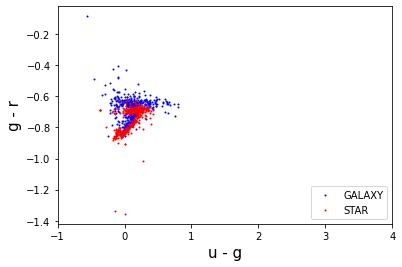

In [80]:
plt.scatter(u_g_train_galaxy, g_r_train_galaxy , color='blue', marker='o', label="GALAXY",s=1)
plt.scatter(u_g_train_star, g_r_train_star, color='red', marker='o', label="STAR",s=1 )
plt.xlabel('u - g' ,  fontsize=15, color="k")
plt.ylabel('g - r',  fontsize=15, color="k")
#plt.ylim(-0.1, 3)
plt.xlim(-1, 4)
plt.legend(loc = 4)

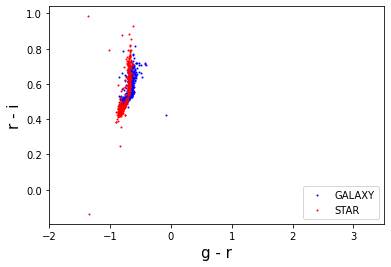

In [94]:
plt.scatter(g_r_train_galaxy, r_i_train_galaxy , color='b', marker='o', label="GALAXY", s=1)
plt.scatter(g_r_train_star, r_i_train_star, color='red', marker='o', label="STAR",s=1 )
plt.xlabel('g - r',  fontsize=15, color="black")
plt.ylabel('r - i',  fontsize=15, color="k")
#plt.ylim(-0.5, 2)
plt.xlim(-2, 3.5)
#lt.xticks(np.arange(4), ['-2', '-1','0', '1', '2','3'])
plt.legend(loc = 4)


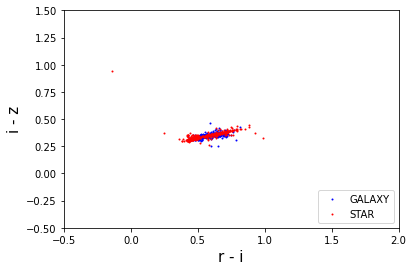

In [84]:
plt.scatter(r_i_train_galaxy, i_z_train_galaxy , color='blue', marker='o', label="GALAXY", s=1)
plt.scatter(r_i_train_star, i_z_train_star, color='red', marker='o', label="STAR",s=1 )
plt.xlabel('r - i',  fontsize=15, color="k")
plt.ylabel('i - z',  fontsize=15, color="k")
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 2)
plt.legend(loc = 4)

In [ ]:
data

,u_g,g_r,r_i,i_z,c,psf_r,u,g,r,i,z,Target
0,2.338095,0.965683,0.951351,0.537676,2.463001,1.000790,23.285988,20.947893,19.982210,19.030859,18.493183,STAR
1,1.542921,0.769695,0.350641,-1.091827,3.839542,0.205792,22.854280,21.311359,20.541664,20.191023,21.282850,STAR
2,1.675731,1.748184,1.073052,0.618036,2.858039,1.326976,22.466951,20.791220,19.043036,17.969984,17.351948,STAR
3,1.931715,0.849874,0.900654,-0.004587,1.747248,0.097423,24.551933,22.620218,21.770344,20.869690,20.874277,STAR
4,1.791198,0.427948,0.135430,0.314285,2.367925,0.048649,23.549871,21.758673,21.330725,21.195295,20.881010,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...
4303,2.034109,1.130727,0.453623,0.353010,3.284126,2.690479,18.669294,16.635185,15.504458,15.050835,14.697825,GALAXY
4304,3.470188,1.738305,0.614980,0.400946,3.135792,1.365153,23.696751,20.226563,18.488258,17.873278,17.472332,GALAXY
4305,0.684719,1.684629,0.829972,0.518657,2.542684,0.992477,22.511236,21.826517,20.141888,19.311916,18.793259,GALAXY
4306,0.389780,0.388037,0.418539,0.476338,2.408247,0.088703,21.349499,20.959719,20.571682,20.153143,19.676805,GALAXY


In [63]:
ac = data.values

In [64]:
c_star = []
u_g_star = []
g_r_star = []
r_i_star = []
i_z_star = []
u_r_star = []
r_z_star = []
for p in ac:
    if p[-1] =='STAR':
        u_g_star.append(p[0])
        g_r_star.append(p[1])
        r_i_star.append(p[2])
        i_z_star.append(p[3])
        c_star.append(p[4])
    else:
        pass

In [65]:
c_galaxy = []
u_g_galaxy = []
g_r_galaxy = []
r_i_galaxy = []
i_z_galaxy = []
u_r_galaxy = []
r_z_galaxy = []
r_train_galaxy = []
for p in ac:
    if p[-1] =='GALAXY':
        u_g_galaxy.append(p[0])
        g_r_galaxy.append(p[1])
        r_i_galaxy.append(p[2])
        i_z_galaxy.append(p[3])
        c_galaxy.append(p[4])
    else:
        pass

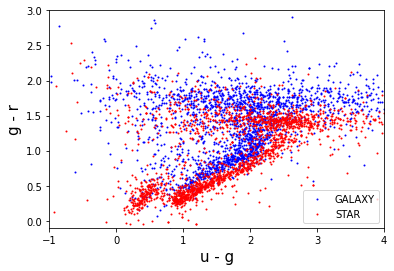

In [66]:
plt.scatter(u_g_galaxy, g_r_galaxy , color='blue', marker='o', label="GALAXY",s=1)
plt.scatter(u_g_star, g_r_star, color='red', marker='o', label="STAR",s=1 )
plt.xlabel('u - g' ,  fontsize=15, color="k")
plt.ylabel('g - r',  fontsize=15, color="k")
plt.ylim(-0.1, 3)
plt.xlim(-1, 4)
plt.legend(loc = 4)

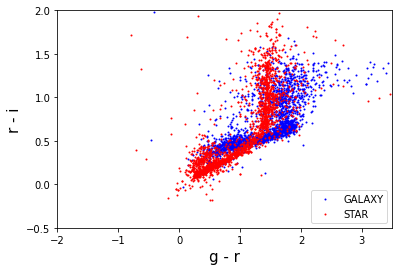

In [67]:
plt.scatter(g_r_galaxy, r_i_galaxy , color='blue', marker='o', label="GALAXY", s=1)
plt.scatter(g_r_star, r_i_star, color='red', marker='o', label="STAR",s=1 )
plt.xlabel('g - r',  fontsize=15, color="k")
plt.ylabel('r - i',  fontsize=15, color="k")
plt.ylim(-0.5, 2)
plt.xlim(-2, 3.5)
plt.legend(loc = 4)

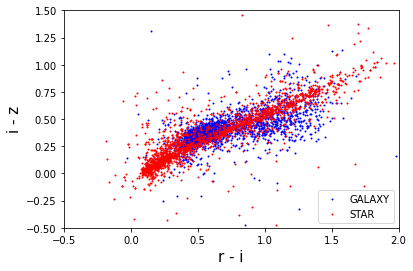

In [68]:
plt.scatter(r_i_galaxy, i_z_galaxy , color='blue', marker='o', label="GALAXY", s=1)
plt.scatter(r_i_star, i_z_star, color='red', marker='o', label="STAR",s=1 )
plt.xlabel('r - i',  fontsize=15, color="k")
plt.ylabel('i - z',  fontsize=15, color="k")
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 2)
plt.legend(loc = 4)

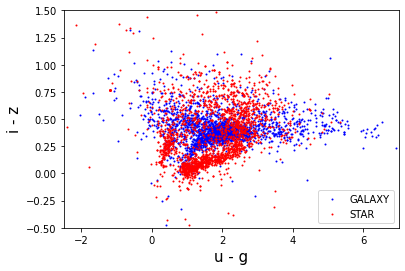

In [ ]:
plt.scatter(u_g_galaxy, i_z_galaxy , color='blue', marker='o', label="GALAXY", s=1)
plt.scatter(u_g_star, i_z_star, color='red', marker='o', label="STAR",s=1 )
plt.xlabel('u - g',  fontsize=15, color="k")
plt.ylabel('i - z',  fontsize=15, color="k")
plt.ylim(-0.5, 1.5)
plt.xlim(-2.5, 7)
plt.legend(loc = 4)